In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('Data/car_price_data.csv')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [3]:
df.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
df_market_category = pd.DataFrame(df.market_category.value_counts().reset_index())
df_market_category = df_market_category.rename(columns={'index':'market_category', 'market_category':'quantity'})
df_market_category

,market_category,quantity
0,crossover,1110
1,flex_fuel,872
2,luxury,855
3,"luxury,performance",673
4,hatchback,641
...,...,...
66,"crossover,exotic,luxury,performance",1
67,"exotic,luxury,high-performance,hybrid",1
68,"crossover,exotic,luxury,high-performance",1
69,"flex_fuel,factory_tuner,luxury,high-performance",1


## Exploratory data analysis

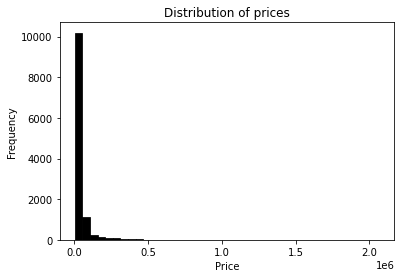

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

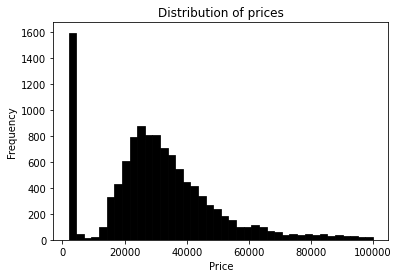

In [10]:
plt.figure(figsize=(6, 4))

sns.histplot(df.msrp[df.msrp < 100000], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

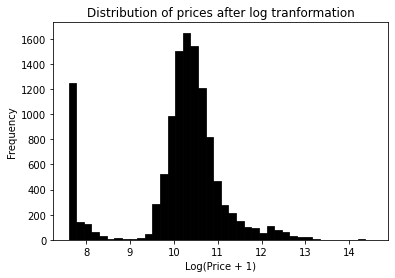

In [11]:
log_price = np.log1p(df.msrp)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [12]:
df_final = df[['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity', 'msrp']].fillna(0)
df_final

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,msrp
0,335.0,6.0,26,19,3916,46135
1,300.0,6.0,28,19,3916,40650
2,300.0,6.0,28,20,3916,36350
3,230.0,6.0,28,18,3916,29450
4,230.0,6.0,28,18,3916,34500
...,...,...,...,...,...,...
11909,300.0,6.0,23,16,204,46120
11910,300.0,6.0,23,16,204,56670
11911,300.0,6.0,23,16,204,50620
11912,300.0,6.0,23,16,204,50920


In [13]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()

# df_preprocessed = scaler.fit_transform(df_final)
# df_preprocessed = pd.DataFrame(df_preprocessed, columns=df_final.columns)

# df_preprocessed


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,:5], df_final['msrp'], random_state=123)

In [15]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

8935
8935
2979
2979


In [26]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
                        booster='gbtree', 
                        objective="reg:squarederror", 
                        # learning_rate=0.1, 
                        # n_estimators=100, 
                        # random_state=2, 
                        # n_jobs=-1
)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
df_test

RMSE: 13227.32


,prediction,actual,difference
0,1110.078979,2000,889.921021
1,454938.937500,433550,21388.937500
2,34394.230469,35315,920.769531
3,36757.718750,30145,6612.718750
4,38787.464844,39900,1112.535156
...,...,...,...
2974,34945.171875,38730,3784.828125
2975,12734.262695,14250,1515.737305
2976,112677.390625,129900,17222.609375
2977,35189.070312,36300,1110.929688


In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
df_test

RMSE: 40840.48


,prediction,actual,difference
0,-5932.804848,2000,7932.804848
1,145481.919385,433550,288068.080615
2,45974.258409,35315,10659.258409
3,52163.609693,30145,22018.609693
4,67538.224099,39900,27638.224099
...,...,...,...
2974,48260.922636,38730,9530.922636
2975,-1900.530146,14250,16150.530146
2976,135247.722492,129900,5347.722492
2977,102499.238928,36300,66199.238928


In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.8)

ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE: %0.2f" % (rmse))

df_test = pd.DataFrame({'prediction':y_pred, 'actual':y_test, 'difference': abs(y_test - y_pred)}).reset_index(drop=True)
df_test

RMSE: 40840.37


,prediction,actual,difference
0,-5932.817274,2000,7932.817274
1,145478.882472,433550,288071.117528
2,45974.535362,35315,10659.535362
3,52163.474203,30145,22018.474203
4,67537.980738,39900,27637.980738
...,...,...,...
2974,48260.614058,38730,9530.614058
2975,-1900.965484,14250,16150.965484
2976,135248.156188,129900,5348.156188
2977,102498.786244,36300,66198.786244
